In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
pybamm.set_logging_level("NOTICE")

In [2]:
pybamm.parameter_sets.Chen2020

{'chemistry': 'lithium_ion',
 'cell': 'LGM50_Chen2020',
 'negative electrode': 'graphite_Chen2020',
 'separator': 'separator_Chen2020',
 'positive electrode': 'nmc_Chen2020',
 'electrolyte': 'lipf6_Nyman2008',
 'experiment': '1C_discharge_from_full_Chen2020',
 'sei': 'example',
 'citation': 'Chen2020'}

In [3]:
pybamm.PARAMETER_PATH

['C:\\Users\\SObrador\\OneDrive - IREC-edu\\PROGRAMS\\Python\\env\\lib\\site-packages',
 'C:\\Users\\SObrador\\OneDrive - IREC-edu\\PROGRAMS\\Python\\Jupyter Notebooks\\1. Laboratory tests\\Bateries_Simulations',
 'C:\\Users\\SObrador\\OneDrive - IREC-edu\\PROGRAMS\\Python\\env\\lib\\site-packages\\pybamm\\input\\parameters']

In [4]:
%%cmd
pybamm_edit_parameter lithium_ion

Microsoft Windows [Version 10.0.22000.856]
(c) Microsoft Corporation. All rights reserved.

(env) C:\Users\SObrador\OneDrive - IREC-edu\PROGRAMS\Python\Jupyter Notebooks\1. Laboratory tests\Bateries_Simulations>pybamm_edit_parameter lithium_ion


Traceback (most recent call last):
  File "C:\Users\SObrador\OneDrive - IREC-edu\PROGRAMS\Python\env\lib\site-packages\pybamm\parameters_cli.py", line 74, in copy_directory
    shutil.copytree(source, destination)
  File "C:\Users\SObrador\AppData\Local\Programs\Python\Python39\lib\shutil.py", line 568, in copytree
    return _copytree(entries=entries, src=src, dst=dst, symlinks=symlinks,
  File "C:\Users\SObrador\AppData\Local\Programs\Python\Python39\lib\shutil.py", line 467, in _copytree
    os.makedirs(dst, exist_ok=dirs_exist_ok)
  File "C:\Users\SObrador\AppData\Local\Programs\Python\Python39\lib\os.py", line 225, in makedirs
    mkdir(name, mode)
FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'lithium_ion'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SObrador\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(c

Parameter set already defined, erase? (y/n): 
(env) C:\Users\SObrador\OneDrive - IREC-edu\PROGRAMS\Python\Jupyter Notebooks\1. Laboratory tests\Bateries_Simulations>

In [5]:
chemistry = pybamm.parameter_sets.Chen2020
chemistry

{'chemistry': 'lithium_ion',
 'cell': 'LGM50_Chen2020',
 'negative electrode': 'graphite_Chen2020',
 'separator': 'separator_Chen2020',
 'positive electrode': 'nmc_Chen2020',
 'electrolyte': 'lipf6_Nyman2008',
 'experiment': '1C_discharge_from_full_Chen2020',
 'sei': 'example',
 'citation': 'Chen2020'}

In [6]:
chemistry["cell"] = "1_NMC_lab"
chemistry["experiment"] = "01C_discharge_from_full_NMC_lab"
chemistry

{'chemistry': 'lithium_ion',
 'cell': '1_NMC_lab',
 'negative electrode': 'graphite_Chen2020',
 'separator': 'separator_Chen2020',
 'positive electrode': 'nmc_Chen2020',
 'electrolyte': 'lipf6_Nyman2008',
 'experiment': '01C_discharge_from_full_NMC_lab',
 'sei': 'example',
 'citation': 'Chen2020'}

In [7]:
parameter_values  = pybamm.ParameterValues(chemistry=chemistry)
# Cell parameters changed
Capacity = parameter_values["Nominal cell capacity [A.h]"]
Capacity

4.0

In [8]:
parameter_values["Typical current [A]"]

2.0

In [9]:
parameter_values["Current function [A]"]

2.0

In [10]:
# Experiment parameters changed
parameter_values["Lower voltage cut-off [V]"]

2.75

In [11]:
parameter_values["Upper voltage cut-off [V]"]

4.2

In [12]:
# Experiment settings at the lab according to the Gregory Plett Books at 25ºC
experiment = pybamm.Experiment([
    ("Discharge at 0.033 C until 2.75V",
    "Rest for 20 hours",
    "Charge at 0.033 C until 4.20V",)
])

In [13]:
model = pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]","Current [A]"])

2022-09-05 16:55:19.626 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (20.580 ms elapsed) --------------------
2022-09-05 16:55:19.627 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/3: Discharge at 0.033 C until 2.75V
2022-09-05 16:55:26.795 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/3: Rest for 20 hours
2022-09-05 16:55:30.183 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 3/3: Charge at 0.033 C until 4.20V
2022-09-05 16:55:38.411 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 18.805 s


interactive(children=(FloatSlider(value=0.0, description='t', max=96.3445056163255, step=0.963445056163255), O…

In [14]:
# Experiment setting s at the lab according to the paper An Electrical Equivalent Circuit Model by Seyed Saeed et all
# Part 1

experiment1 = pybamm.Experiment([
    ("Discharge at 0.25 C until 2.75V",
    "Rest for 15 minutes",
    "Charge at 0.25 C until 4.20V",)
])
sim = pybamm.Simulation(model, experiment=experiment1, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]","Current [A]"])

2022-09-05 16:55:40.508 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (16.462 ms elapsed) --------------------
2022-09-05 16:55:40.508 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/3: Discharge at 0.25 C until 2.75V
2022-09-05 16:55:41.658 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/3: Rest for 15 minutes
2022-09-05 16:55:41.865 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 3/3: Charge at 0.25 C until 4.20V
2022-09-05 16:55:43.322 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 2.831 s


interactive(children=(FloatSlider(value=0.0, description='t', max=10.016446394384976, step=0.10016446394384976…

In [15]:
# Part 2 discharging at same time steps
init_socs = [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
n = len(init_socs)
C_rate = float(0.25)
t = Capacity/C_rate
time = t/n
time

0.8

In [16]:
# The time of discharge must be equal to the variable time (INSER MANUALLY)
cycle = ["Discharge at 0.25 C for 0.5 hour", "Rest for 180 minutes"]*50
experiment2 = pybamm.Experiment([tuple(cycle)])
sim = pybamm.Simulation(model, experiment=experiment2, parameter_values=parameter_values)
sim.solve()
sim.plot(["Terminal voltage [V]","Current [A]"])

2022-09-05 16:55:44.253 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (18.510 ms elapsed) --------------------
2022-09-05 16:55:44.254 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/100: Discharge at 0.25 C for 0.5 hour
2022-09-05 16:55:44.494 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/100: Rest for 180 minutes
2022-09-05 16:55:45.282 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 3/100: Discharge at 0.25 C for 0.5 hour
2022-09-05 16:55:45.409 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 4/100: Rest for 180 minutes
2022-09-05 16:55:46.015 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 5/100: Discharge at 0.25 C for 0.5 hour
2022-09-05 16:55:46.160 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 6/100: Rest for 180 minutes
2022-09-05 16:55:46.779 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 7/100: Discharge at 0.25 C for 0.5 hour
2022-09-05 16:55:46.919 - [NOTICE] callbacks.on_step_start(182): Cycle 1

interactive(children=(FloatSlider(value=0.0, description='t', max=35.009613883468674, step=0.35009613883468677…

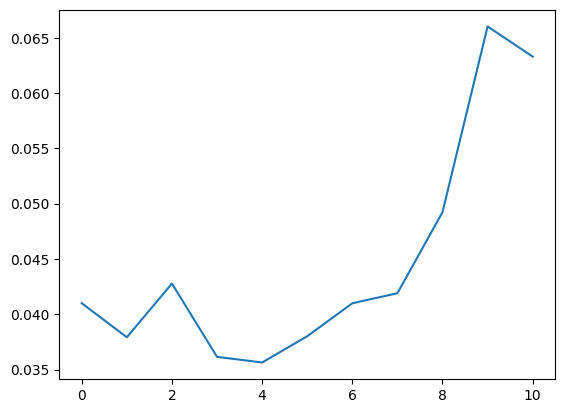

In [17]:
# Calculating the reistance value variable of pybamm
sol = sim.solution
def extract_resistance(step):
    return step["Local ECM resistance [Ohm]"].data[-1]
Rs = [extract_resistance(step) for i, step in enumerate(sol.cycles[0].steps) if i%2==0]
plt.plot(np.arange(len(Rs)),Rs)



In [18]:
# Part 3 discharging from different soc
experiment3 = pybamm.Experiment([
    ("Discharge at 0.25 C until 2.75",
    "Rest for 15 minutes",)
])
sols = []

for initial_soc in init_socs:
    sim = pybamm.Simulation(model, experiment=experiment3,parameter_values=parameter_values)
    sol = sim.solve(initial_soc=initial_soc)
    sols.append(sol)

ValueError: units must be 'C', 'A', 'mA', 'V', 'W' or 'mW', not '5'.
                    For example: 

    Discharge at 1C for 0.5 hours,
    Discharge at C/20 for 0.5 hours,
    Charge at 0.5 C for 45 minutes,
    Discharge at 1 A for 90 seconds,
    Charge at 200mA for 45 minutes (1 minute period),
    Discharge at 1 W for 0.5 hours,
    Charge at 200 mW for 45 minutes,
    Rest for 10 minutes (5 minute period),
    Hold at 1 V for 20 seconds,
    Charge at 1 C until 4.1V,
    Hold at 4.1 V until 50 mA,
    Hold at 3V until C/50,
    Run US06 (A),
    Run US06 (A) for 20 seconds,
    Run US06 (V) for 45 minutes,
    Run US06 (W) for 2 hours,
    
                    

In [ ]:
pybamm.dynamic_plot(sols, ["Current [A]",
    "Terminal voltage [V]"], labels=[f"initial soc = {x}" for x in init_socs])